In [1]:
!apt-get install -y tesseract-ocr
%pip install pytesseract

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pytesseract
import cv2
import numpy as np
import pytesseract
import cv2
import os

In [3]:
def process_image(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noise_free = cv2.fastNlMeansDenoising(gray_image)
    binary_thresh = cv2.threshold(noise_free, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return binary_thresh

In [4]:
def text_regions(image_data):
    detected_data = pytesseract.image_to_data(image_data, output_type=pytesseract.Output.DICT)
    return detected_data

In [5]:
def mark_text_regions(img, detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            (x, y, width, height) = (detected_boxes['left'][i], detected_boxes['top'][i], detected_boxes['width'][i], detected_boxes['height'][i])
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    return output_img

In [6]:
def extract_text(detected_boxes):
    text_content = []
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            text_content.append(detected_boxes['text'][i])
    return ' '.join(text_content)

Step 1: Image loaded


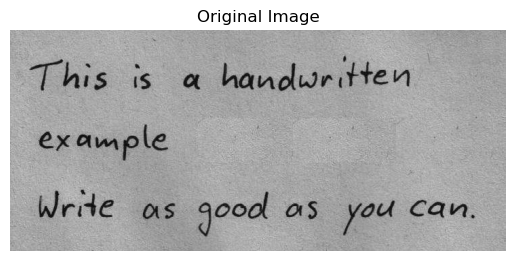

Step 2: Preprocessing done
Step 3: Text regions detected
Step 4: Bounding boxes marked


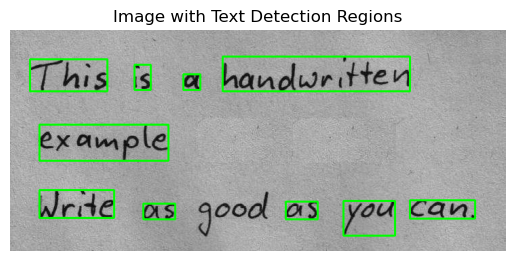

Step 5: OCR done

Detected Text: This is a handwritten example Write as as you can,


In [7]:
# img_path = "E:\VIIT\TY\DL\DL Lab Assignments\Dl_Assignment-5\Sample-handwritten-text-input-for-OCR.png"

# image_loaded = cv2.imread(img_path)

# # Check if image was successfully loaded
# if image_loaded is None:
#     print(f"Error: Unable to read the image file: {img_path}")
# else:
#     # Display original image
#     print("\nOriginal Image:")
#     cv2_imshow(image_loaded)

#     # Preprocess image
#     preprocessed_image = process_image(image_loaded)

#     # Detect text regions
#     text_boxes = text_regions(preprocessed_image)

#     # Draw bounding boxes on the original image
#     image_with_boxes = mark_text_regions(image_loaded, text_boxes)

#     # Display the image with detected text regions
#     print("\nImage with Text Detection Regions:")
#     cv2_imshow(image_with_boxes)

#     # Extract and print detected text
#     extracted_text = extract_text(text_boxes)
#     print("\nDetected Text:")
#     print(extracted_text)
import cv2
import matplotlib.pyplot as plt

img_path = r"E:/VIIT/TY/DL/DL Lab Assignments/Dl_Assignment-5/Sample-handwritten-text-input-for-OCR.png"
image_loaded = cv2.imread(img_path)

if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    print("Step 1: Image loaded")
    plt.imshow(cv2.cvtColor(image_loaded, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    preprocessed_image = process_image(image_loaded)
    print("Step 2: Preprocessing done")

    text_boxes = text_regions(preprocessed_image)
    print("Step 3: Text regions detected")

    image_with_boxes = mark_text_regions(image_loaded, text_boxes)
    print("Step 4: Bounding boxes marked")
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title("Image with Text Detection Regions")
    plt.axis("off")
    plt.show()

    extracted_text = extract_text(text_boxes)
    print("Step 5: OCR done")
    print("\nDetected Text:", extracted_text)
